Main Imports:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("./Life Expectancy Data.csv")
# df = df.dropna(axis=0, subset=df["Life expectancy "])
df_15 = df.loc[df["Year"] == 2015]

Question 1.1:

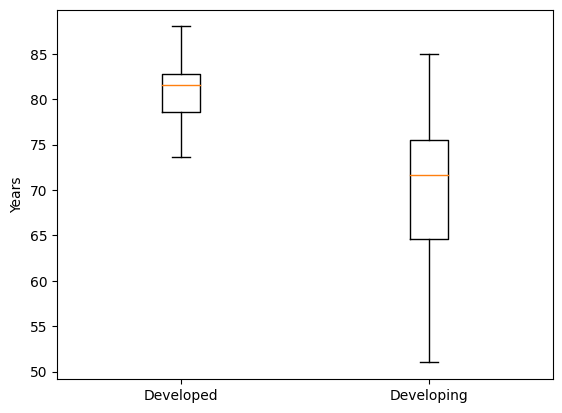

In [26]:
lE = []
for dev in ["Developed", "Developing"]:
    i = np.array(df_15[(df_15["Status"] == dev)]["Life expectancy "])
    lE.append(i)
plt.ylabel("Years")
plt.boxplot(lE, labels=["Developed", "Developing"])
plt.show()

Question 1.2:


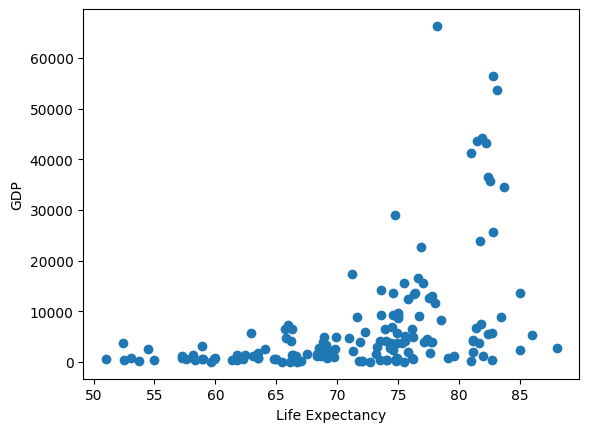

In [27]:
expectancy = np.array(df_15["Life expectancy "])
gdp = np.array(df_15["GDP"])
plt.ylabel("GDP")
plt.xlabel("Life Expectancy")
plt.scatter(expectancy, gdp)
plt.show()

Question 1.3:

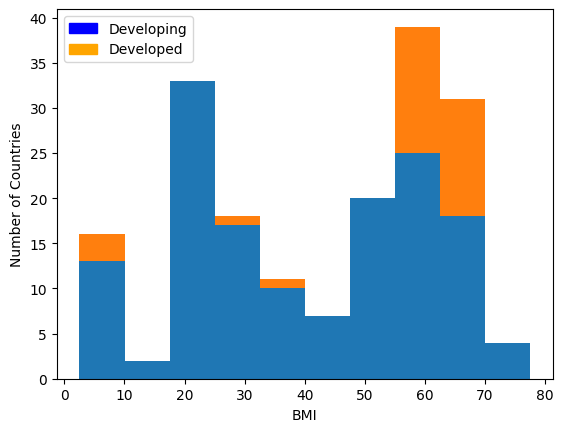

In [28]:
deved = np.array(df_15[df_15["Status"] == "Developed"][" BMI "])
deving = np.array(df_15[df_15["Status"] == "Developing"][" BMI "])
# Legend
colors = {'Developing':'blue', 'Developed':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#Plotting
plt.hist([deving, deved], stacked=True)
plt.legend(handles, labels)
plt.ylabel("Number of Countries")
plt.xlabel("BMI")
plt.show()

Question 1.4

Text(0, 0.5, 'Life Expectancy')

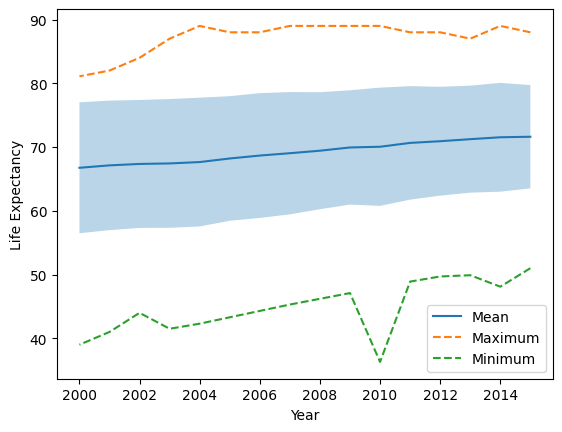

In [29]:
from cmath import isnan, nan
from traceback import print_tb


years = np.array(df[df["Country"] == "Afghanistan"]["Year"])
# df = df.dropna(axis=0)
mean = []
topDot = []
bottomDot = []
uDev = []
lDev = []

for year in years:
    #i = np.array(df_15[(df_15["Status"] == dev)]["Life expectancy "])
    i = np.array(df[(df["Year"] == year)]["Life expectancy "])
    # print(len(i), np.sum(i))
    for j in range(len(i)):
        if j >= len(i):
            break
        if isnan(i[j]):
            i = np.delete(i,j)
    topDot.append(i.max())
    bottomDot.append(i.min())
    uDev.append(np.std(i) + np.sum(i)/len(i))
    lDev.append(np.sum(i)/len(i) - np.std(i))
    mean.append(np.sum(i)/len(i))

plt.plot(years, mean, label="Mean")
# plt.plot(years, uDev)
# plt.plot(years, lDev)
plt.fill_between(years, uDev, lDev, alpha=.3)
plt.plot(years, topDot, "--", label="Maximum")
plt.plot(years, bottomDot, "--", label="Minimum")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

Question 1.5

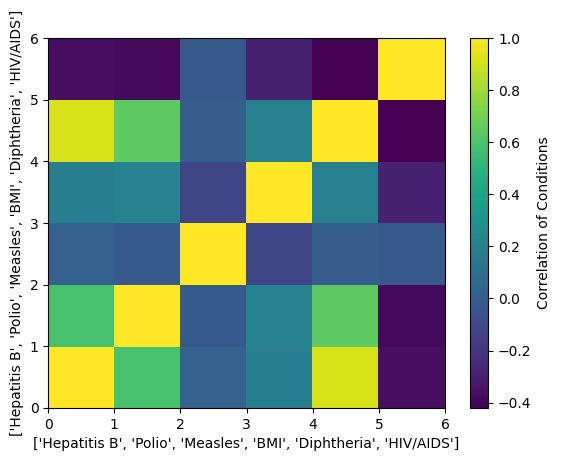

In [30]:
smaller = df_15.loc[:, ["Hepatitis B", "Polio", "Measles ", " BMI ", "Diphtheria ", " HIV/AIDS"]]
smaller = smaller.dropna()
hepB = pd.array(smaller["Hepatitis B"])
polio = pd.array(smaller["Polio"])
measles = pd.array(smaller["Measles "])
bmi = pd.array(smaller[" BMI "])
dip = pd.array(smaller["Diphtheria "])
hiv = pd.array(smaller[" HIV/AIDS"])
lists = [hepB, polio, measles, bmi, dip, hiv]
listsb = ["Hepatitis B", "Polio", "Measles", "BMI", "Diphtheria", "HIV/AIDS"]
plt.ylabel(listsb)
plt.xlabel(listsb)
matrix = np.corrcoef(lists)
plt.pcolor(matrix)
cbar = plt.colorbar()
cbar.set_label("Correlation of Conditions")
plt.show()